## Etapa 2: Importando as bibliotecas

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
import numpy as np

%matplotlib inline
tf.__version__

'2.4.1'

In [7]:
# Configurando o nome das classes que serão previstas
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
# Carregando a base de dados
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Normalização das imagens

In [18]:
X_train[0].shape

(32, 32, 3)

In [7]:
X_train = X_train / 255.0

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test = X_test / 255.0

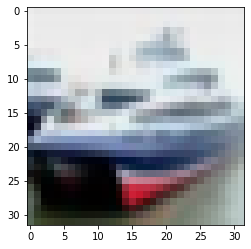

In [ ]:
plt.imshow(X_test[1])

## Etapa 4: Construindo a Rede Neural Convolucional

###  Sem Sequential model

In [9]:
inputs = tf.keras.layers.Input(X_train.shape[1:])

In [35]:
def forward_propagation(X):

    initializer = tf.keras.initializers.GlorotUniform(seed=0)
    Z1 = tf.keras.layers.Conv2D(filters=64,
                                kernel_size=(3,3),
                                strides = (1,1),
                                kernel_initializer= initializer,
                                padding = 'SAME')(X)
    A1= tf.keras.layers.Activation('relu')(Z1)
    #A1 = tf.keras.layers.BatchNormalization()(A1)
    P1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides = (1,1))(A1)
    F = tf.keras.layers.Flatten()(P1)
    A2 = tf.keras.layers.Dense(units=128, activation='relu')(F)
    A3 = Dropout(0.3)(A2)
    A4 = tf.keras.layers.Dense(units=10, activation='softmax')(A3)
    ### END CODE HERE ###

    return A4

In [36]:
A4 = forward_propagation(inputs)

In [37]:
model = tf.keras.Model(inputs=inputs, outputs=A4)

In [38]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [40]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6999 - sparse_categorical_accuracy: 0.7354
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6678 - sparse_categorical_accuracy: 0.7468
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6479 - sparse_categorical_accuracy: 0.7543
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6284 - sparse_categorical_accuracy: 0.7618
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6054 - sparse_categorical_accuracy: 0.7712
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5802 - sparse_categorical_accuracy: 0.7772
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5685 - sparse_categorical_accuracy: 0.7821
Epoch 8/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5574 - sparse_categorical_accuracy: 0.7879
Epoch 9/20
1563/1563 [==========

In [41]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7424 - sparse_categorical_accuracy: 0.6173


In [42]:
model.save('cifar10.h5')

In [8]:
model = load_model('cifar10.h5')

In [9]:
def preprocess_image(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=(32, 32))
    img = keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return tf.convert_to_tensor(img)

In [11]:
img = preprocess_image('carro.jpg')

In [12]:
predict =model.predict(img)

In [13]:
class_names[np.argmax(predict)]

'automobile'

 ### Com Sequential model

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
#tf.keras.regularizers.l2(0.005)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1

### Compilando o modelo

#### sparse_categorical_accuracy

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Treinando o modelo

In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5941 - sparse_categorical_accuracy: 0.4248
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0993 - sparse_categorical_accuracy: 0.6153
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9397 - sparse_categorical_accuracy: 0.6707
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8203 - sparse_categorical_accuracy: 0.7114
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7250 - sparse_categorical_accuracy: 0.7455


### Avaliando o modelo

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0460 - sparse_categorical_accuracy: 0.6462


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.676800012588501


In [ ]:
test_loss

1.5279629726409911